In [71]:
# Import library
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [72]:
# Load data, change data untuk kolom target
df = pd.read_csv("data.csv", delimiter=";")
df['target'] = (df["target"] != "Iris-setosa").astype(int)

# Split dulu (masih dalam bentuk DataFrame)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["target"], shuffle=True) # with shuffle
# train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=False) # no shuffle
n = len(df)
n_train = len(train_df)
n_val = len(val_df)
print (f"Data training (80%) : {len(train_df)} rows")
display (train_df)
print (f"Data validation (20%) : {len(val_df)} rows")
display (val_df)

# Extract fitur & target dari masing-masing subset
x_train = train_df[["x1", "x2", "x3", "x4"]].to_numpy()
y_train = train_df["target"].to_numpy()
x_val = val_df[["x1", "x2", "x3", "x4"]].to_numpy()
y_val = val_df["target"].to_numpy()

Data training (80%) : 80 rows


,x1,x2,x3,x4,target
15,5.7,4.4,1.5,0.4,0
52,6.9,3.1,4.9,1.5,1
60,5.0,2.0,3.5,1.0,1
66,5.6,3.0,4.5,1.5,1
68,6.2,2.2,4.5,1.5,1
...,...,...,...,...,...
17,5.1,3.5,1.4,0.3,0
36,5.5,3.5,1.3,0.2,0
85,6.0,3.4,4.5,1.6,1
21,5.1,3.7,1.5,0.4,0


Data validation (20%) : 20 rows


,x1,x2,x3,x4,target
57,4.9,2.4,3.3,1.0,1
77,6.7,3.0,5.0,1.7,1
63,6.1,2.9,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
7,5.0,3.4,1.5,0.2,0
14,5.8,4.0,1.2,0.2,0
20,5.4,3.4,1.7,0.2,0
75,6.6,3.0,4.4,1.4,1
18,5.7,3.8,1.7,0.3,0
22,4.6,3.6,1.0,0.2,0


In [73]:
# Inisialization 
epochs = 7
lr = 0.1
b = 1

# Variabel untuk menyimpan accuracy dan loss
train_acc = np.zeros(epochs)
val_acc = np.zeros(epochs)
train_loss = np.zeros(epochs)
val_loss = np.zeros(epochs)

# Variabel untuk menyimpan bobot bias, teta1, teta2, teta3, teta4
wb = np.zeros(n * epochs)
t1 = np.zeros(n * epochs)
t2 = np.zeros(n * epochs)
t3 = np.zeros(n * epochs)
t4 = np.zeros(n * epochs)
wb[0] = 0.5
t1[0] = 0.5
t2[0] = 0.5
t3[0] = 0.5
t4[0] = 0.5

# Variabel untuk menyimpan bobot dbias, dteta1, dteta2, dteta3, dteta4
dbias = np.zeros(len(train_df) * epochs)
dteta1 = np.zeros(len(train_df) * epochs)
dteta2 = np.zeros(len(train_df) * epochs)
dteta3 = np.zeros(len(train_df) * epochs)
dteta4 = np.zeros(len(train_df) * epochs)

In [74]:
for e in range(epochs):
    train_accuracy = 0
    val_accuracy = 0
    train_mse = 0
    val_mse = 0
    rows = []
    
    # Training Phase
    for i in range(n_train):
        x1 = x_train[i][0]
        x2 = x_train[i][1]
        x3 = x_train[i][2]
        x4 = x_train[i][3]
        target = y_train[i]

        # Calculate dot z, g(z), error, sum square error
        z = (b * wb[(e*n_train)+i]) + (x1 * t1[(e*n_train)+i]) + (x2 * t2[(e*n_train)+i]) + (x3 * t3[(e*n_train)+i]) + (x4 * t4[(e*n_train)+i])
        gz = 1 / (1 + math.exp(-z))
        error = gz - target
        sse = math.pow(error, 2)

        # Calculate dbias, dteta1, dteta2, dteta3, dteta4
        dbias = 2 * (gz - target) * (1 - gz) * gz * b
        dteta1 = 2 * (gz - target) * (1 - gz) * gz * x1
        dteta2 = 2 * (gz - target) * (1 - gz) * gz * x2
        dteta3 = 2 * (gz - target) * (1 - gz) * gz * x3
        dteta4 = 2 * (gz - target) * (1 - gz) * gz * x4

        # Check Training Prediction
        if gz > 0.5:
            predicted_label = 1
        else:
            predicted_label = 0

        # Calculate Training Accuracy
        if target == predicted_label:
            train_accuracy += 1

        # Calculate Validation Loss
        train_mse = train_mse + sse
        
        # Update Weight Bias, Teta1, Teta2, Teta3, Teta4
        if i < n_train:
            wb[(e*n_train)+i+1] = wb[(e*n_train)+i] - (lr * dbias) 
            t1[(e*n_train)+i+1] = t1[(e*n_train)+i] - (lr * dteta1) 
            t2[(e*n_train)+i+1] = t2[(e*n_train)+i] - (lr * dteta2) 
            t3[(e*n_train)+i+1] = t3[(e*n_train)+i] - (lr * dteta3) 
            t4[(e*n_train)+i+1] = t4[(e*n_train)+i] - (lr * dteta4)

        rows.append({
            "phase": "training",
            "data ke-": i,
            # "x1": x1,
            # "x2": x2,
            # "x3": x3,
            # "x4": x4,
            # "target": target,
            "z": z,
            "gz": gz,
            "error": error,
            "sse": sse,
            "predicted_label": predicted_label
            # "wb": wb[e][i],
            # "t1": t1[e][i],
            # "t2": t2[e][i],
            # "t3": t3[e][i],
            # "t4": t4[e][i],
            # "dbias": dbias,
            # "dteta1": dteta1,
            # "dteta2": dteta2,
            # "dteta3": dteta3,
            # "dteta4": dteta4,
        })
        
    wb_val = wb[(e*n_train)+i+1]
    t1_val = t1[(e*n_train)+i+1]
    t2_val = t2[(e*n_train)+i+1]
    t3_val = t3[(e*n_train)+i+1]
    t4_val = t4[(e*n_train)+i+1]

    # Validation Phase
    for i in range(n_val):
        x1 = x_val[i][0]
        x2 = x_val[i][1]
        x3 = x_val[i][2]
        x4 = x_val[i][3]
        target = y_val[i]
        
        # Calculate dot z, g(z), error, sum square error
        z = (b * wb_val) + (x1 * t1_val) + (x2 * t2_val) + (x3 * t3_val) + (x4 * t4_val)
        gz = 1 / (1 + math.exp(-z))
        error = gz - target
        sse = math.pow(error, 2)

        # Check Validation Prediction
        if gz > 0.5:
            predicted_label = 1
        else:
            predicted_label = 0

        # Calculate Validation Accuracy
        if target == predicted_label:
            val_accuracy += 1
        
        # Calculate Validation Loss
        val_mse = val_mse + sse

        rows.append({
            "phase": "validation",
            "data ke-": i,
            # "x1": x1,
            # "x2": x2,
            # "x3": x3,
            # "x4": x4,
            # "target": target,
            "z": z,
            "gz": gz,
            "error": error,
            "sse": sse,
            "predicted_label": predicted_label
            # "wb_val": wb_val,
            # "t1_val": t1_val,
            # "t2_val": t2_val,
            # "t3_val": t3_val,
            # "t4_val": t4_val
        })
    
    # Calculate Training Accuracy and Loss per Epoch
    train_acc[e] = (train_accuracy / n_train) * 100
    train_loss[e] = (train_mse / n_train)
    
    # Calculate Validation Accuracy and Loss per Epoch
    val_acc[e] = (val_accuracy / n_val) * 100
    val_loss[e] = (val_mse / n_val)

    # Print result per epoch
    print (f"Epoch ke- {str(e)}")
    print (f"Training Phase; accuracy: {train_acc[e]:.6f}%; loss: {train_loss[e]:.6f}")
    df_rows = pd.DataFrame(rows)
    display (df_rows.head(80))
    print (f"Validation Phase; accuracy: {val_acc[e]:.6f}%; loss: {val_loss[e]:.6f}")
    display (df_rows.iloc[80:101])

Epoch ke- 0
Training Phase; accuracy: 51.250000%; loss: 0.441696


,phase,data ke-,z,gz,error,sse,predicted_label
0,training,0,6.500000,0.998499,0.998499,9.969999e-01,1
1,training,1,8.681465,0.999830,-0.000170,2.878908e-08,1
2,training,2,6.236845,0.998048,-0.001952,3.811082e-06,1
3,training,3,7.784035,0.999584,-0.000416,1.731856e-07,1
4,training,4,7.684068,0.999540,-0.000460,2.114968e-07,1
...,...,...,...,...,...,...,...
75,training,75,0.449373,0.610490,0.610490,3.726983e-01,1
76,training,76,-0.941811,0.280535,0.280535,7.869974e-02,0
77,training,77,-0.013238,0.496691,-0.503309,2.533205e-01,0
78,training,78,0.114978,0.528713,0.528713,2.795374e-01,1


Validation Phase; accuracy: 55.000000%; loss: 0.169219


,phase,data ke-,z,gz,error,sse,predicted_label
80,validation,0,-0.260374,0.435272,-0.564728,0.318918,0
81,validation,1,-0.093458,0.476652,-0.523348,0.273893,0
82,validation,2,-0.103654,0.474110,-0.525890,0.276561,0
83,validation,3,-0.282980,0.429723,-0.570277,0.325215,0
84,validation,4,-1.476750,0.185919,0.185919,0.034566,0
85,validation,5,-1.977146,0.121623,0.121623,0.014792,0
86,validation,6,-1.560185,0.173620,0.173620,0.030144,0
87,validation,7,-0.415435,0.397610,-0.602390,0.362874,0
88,validation,8,-1.684095,0.156554,0.156554,0.024509,0
89,validation,9,-1.527860,0.178307,0.178307,0.031793,0


Epoch ke- 1
Training Phase; accuracy: 97.500000%; loss: 0.062813


,phase,data ke-,z,gz,error,sse,predicted_label
0,training,0,-1.792339,0.142786,0.142786,0.020388,0
1,training,1,-0.536434,0.369018,-0.630982,0.398139,0
2,training,2,1.449820,0.809971,-0.190029,0.036111,1
3,training,3,2.324331,0.910872,-0.089128,0.007944,1
4,training,4,2.362671,0.913936,-0.086064,0.007407,1
...,...,...,...,...,...,...,...
75,training,75,-1.456778,0.188961,0.188961,0.035706,0
76,training,76,-2.029768,0.116113,0.116113,0.013482,0
77,training,77,2.180588,0.898493,-0.101507,0.010304,1
78,training,78,-1.621287,0.165027,0.165027,0.027234,0


Validation Phase; accuracy: 100.000000%; loss: 0.020671


,phase,data ke-,z,gz,error,sse,predicted_label
80,validation,0,1.084265,0.747300,-0.252700,0.063857,1
81,validation,1,2.315378,0.910143,-0.089857,0.008074,1
82,validation,2,2.075007,0.888450,-0.111550,0.012443,1
83,validation,3,1.657716,0.839931,-0.160069,0.025622,1
84,validation,4,-2.001047,0.119093,0.119093,0.014183,0
85,validation,5,-2.976349,0.048506,0.048506,0.002353,0
86,validation,6,-1.964141,0.123020,0.123020,0.015134,0
87,validation,7,1.496475,0.817048,-0.182952,0.033471,1
88,validation,8,-2.227575,0.097301,0.097301,0.009468,0
89,validation,9,-2.456860,0.078938,0.078938,0.006231,0


Epoch ke- 2
Training Phase; accuracy: 100.000000%; loss: 0.018408


,phase,data ke-,z,gz,error,sse,predicted_label
0,training,0,-2.678089,0.064279,0.064279,0.004132,0
1,training,1,1.865423,0.865928,-0.134072,0.017975,1
2,training,2,1.618082,0.834530,-0.165470,0.027380,1
3,training,3,2.532048,0.926358,-0.073642,0.005423,1
4,training,4,2.782763,0.941737,-0.058263,0.003395,1
...,...,...,...,...,...,...,...
75,training,75,-1.961401,0.123316,0.123316,0.015207,0
76,training,76,-2.452874,0.079229,0.079229,0.006277,0
77,training,77,2.713453,0.937816,-0.062184,0.003867,1
78,training,78,-1.997405,0.119476,0.119476,0.014274,0


Validation Phase; accuracy: 100.000000%; loss: 0.009899


,phase,data ke-,z,gz,error,sse,predicted_label
80,validation,0,1.521227,0.820719,-0.179281,0.032142,1
81,validation,1,3.110242,0.957313,-0.042687,0.001822,1
82,validation,2,2.792846,0.942288,-0.057712,0.003331,1
83,validation,3,2.291404,0.908163,-0.091837,0.008434,1
84,validation,4,-2.212286,0.098653,0.098653,0.009732,0
85,validation,5,-3.356197,0.033693,0.033693,0.001135,0
86,validation,6,-2.135156,0.105727,0.105727,0.011178,0
87,validation,7,2.120678,0.892897,-0.107103,0.011471,1
88,validation,8,-2.449415,0.079481,0.079481,0.006317,0
89,validation,9,-2.807098,0.056942,0.056942,0.003242,0


Epoch ke- 3
Training Phase; accuracy: 100.000000%; loss: 0.011096


,phase,data ke-,z,gz,error,sse,predicted_label
0,training,0,-3.020615,0.046503,0.046503,0.002163,0
1,training,1,2.621122,0.932209,-0.067791,0.004596,1
2,training,2,2.035997,0.884525,-0.115475,0.013334,1
3,training,3,2.946216,0.950084,-0.049916,0.002492,1
4,training,4,3.256562,0.962908,-0.037092,0.001376,1
...,...,...,...,...,...,...,...
75,training,75,-2.252076,0.095171,0.095171,0.009057,0
76,training,76,-2.730629,0.061190,0.061190,0.003744,0
77,training,77,2.988997,0.952075,-0.047925,0.002297,1
78,training,78,-2.239000,0.096302,0.096302,0.009274,0


Validation Phase; accuracy: 100.000000%; loss: 0.006562


,phase,data ke-,z,gz,error,sse,predicted_label
80,validation,0,1.756206,0.852734,-0.147266,0.021687,1
81,validation,1,3.550975,0.972104,-0.027896,0.000778,1
82,validation,2,3.189863,0.960451,-0.039549,0.001564,1
83,validation,3,2.636134,0.933151,-0.066849,0.004469,1
84,validation,4,-2.368931,0.085573,0.085573,0.007323,0
85,validation,5,-3.618531,0.026121,0.026121,0.000682,0
86,validation,6,-2.269268,0.093700,0.093700,0.008780,0
87,validation,7,2.459554,0.921257,-0.078743,0.006200,1
88,validation,8,-2.616231,0.068101,0.068101,0.004638,0
89,validation,9,-3.045938,0.045393,0.045393,0.002061,0


Epoch ke- 4
Training Phase; accuracy: 100.000000%; loss: 0.008021


,phase,data ke-,z,gz,error,sse,predicted_label
0,training,0,-3.261401,0.036919,0.036919,0.001363,0
1,training,1,3.033128,0.954048,-0.045952,0.002112,1
2,training,2,2.311594,0.909833,-0.090167,0.008130,1
3,training,3,3.248477,0.962618,-0.037382,0.001397,1
4,training,4,3.604245,0.973513,-0.026487,0.000702,1
...,...,...,...,...,...,...,...
75,training,75,-2.458638,0.078809,0.078809,0.006211,0
76,training,76,-2.938315,0.050292,0.050292,0.002529,0
77,training,77,3.171068,0.959731,-0.040269,0.001622,1
78,training,78,-2.420841,0.081597,0.081597,0.006658,0


Validation Phase; accuracy: 100.000000%; loss: 0.004924


,phase,data ke-,z,gz,error,sse,predicted_label
80,validation,0,1.910102,0.871031,-0.128969,0.016633,1
81,validation,1,3.847404,0.979111,-0.020889,0.000436,1
82,validation,2,3.456325,0.969419,-0.030581,0.000935,1
83,validation,3,2.864272,0.946052,-0.053948,0.002910,1
84,validation,4,-2.496607,0.076096,0.076096,0.005791,0
85,validation,5,-3.824175,0.021370,0.021370,0.000457,0
86,validation,6,-2.381693,0.084579,0.084579,0.007154,0
87,validation,7,2.683362,0.936038,-0.063962,0.004091,1
88,validation,8,-2.753168,0.059908,0.059908,0.003589,0
89,validation,9,-3.231736,0.037989,0.037989,0.001443,0


Epoch ke- 5
Training Phase; accuracy: 100.000000%; loss: 0.006316


,phase,data ke-,z,gz,error,sse,predicted_label
0,training,0,-3.451982,0.030710,0.030710,0.000943,0
1,training,1,3.306702,0.964658,-0.035342,0.001249,1
2,training,2,2.503459,0.924384,-0.075616,0.005718,1
3,training,3,3.469390,0.969804,-0.030196,0.000912,1
4,training,4,3.861615,0.979399,-0.020601,0.000424,1
...,...,...,...,...,...,...,...
75,training,75,-2.619617,0.067887,0.067887,0.004609,0
76,training,76,-3.104577,0.042919,0.042919,0.001842,0
77,training,77,3.306143,0.964639,-0.035361,0.001250,1
78,training,78,-2.567294,0.071273,0.071273,0.005080,0


Validation Phase; accuracy: 100.000000%; loss: 0.003943


,phase,data ke-,z,gz,error,sse,predicted_label
80,validation,0,2.022023,0.883090,-0.116910,0.013668,1
81,validation,1,4.067787,0.983173,-0.016827,0.000283,1
82,validation,2,3.654091,0.974768,-0.025232,0.000637,1
83,validation,3,3.031660,0.953984,-0.046016,0.002117,1
84,validation,4,-2.604939,0.068821,0.068821,0.004736,0
85,validation,5,-3.994607,0.018082,0.018082,0.000327,0
86,validation,6,-2.478645,0.077369,0.077369,0.005986,0
87,validation,7,2.847267,0.945177,-0.054823,0.003006,1
88,validation,8,-2.869837,0.053665,0.053665,0.002880,0
89,validation,9,-3.384956,0.032769,0.032769,0.001074,0


Epoch ke- 6
Training Phase; accuracy: 100.000000%; loss: 0.005229


,phase,data ke-,z,gz,error,sse,predicted_label
0,training,0,-3.610830,0.026318,0.026318,0.000693,0
1,training,1,3.508037,0.970916,-0.029084,0.000846,1
2,training,2,2.647471,0.933855,-0.066145,0.004375,1
3,training,3,3.639768,0.974413,-0.025587,0.000655,1
4,training,4,4.061945,0.983076,-0.016924,0.000286,1
...,...,...,...,...,...,...,...
75,training,75,-2.751820,0.059984,0.059984,0.003598,0
76,training,76,-3.243384,0.037565,0.037565,0.001411,0
77,training,77,3.413286,0.968117,-0.031883,0.001017,1
78,training,78,-2.690083,0.063561,0.063561,0.004040,0


Validation Phase; accuracy: 100.000000%; loss: 0.003288


,phase,data ke-,z,gz,error,sse,predicted_label
80,validation,0,2.108881,0.891763,-0.108237,0.011715,1
81,validation,1,4.241979,0.985825,-0.014175,0.000201,1
82,validation,2,3.810185,0.978336,-0.021664,0.000469,1
83,validation,3,3.162542,0.959400,-0.040600,0.001648,1
84,validation,4,-2.699180,0.063022,0.063022,0.003972,0
85,validation,5,-4.140585,0.015664,0.015664,0.000245,0
86,validation,6,-2.563874,0.071500,0.071500,0.005112,0
87,validation,7,2.975214,0.951442,-0.048558,0.002358,1
88,validation,8,-2.971601,0.048725,0.048725,0.002374,0
89,validation,9,-3.515737,0.028868,0.028868,0.000833,0


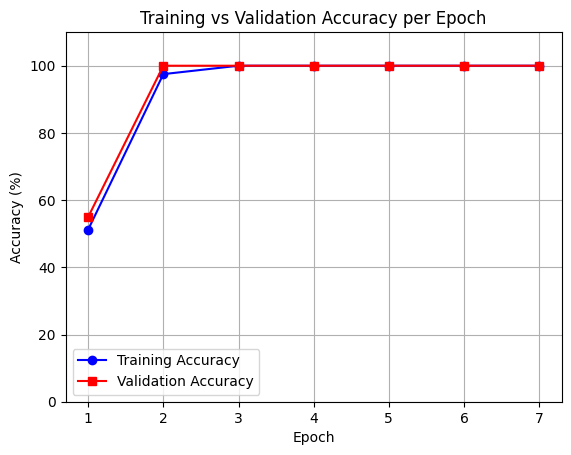

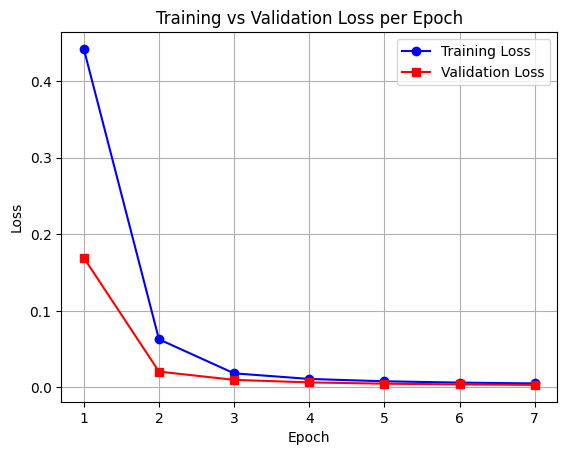

In [75]:
# Plot Training and Validation Accuracy per Epoch
plt.plot(range(1, epochs+1), train_acc, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(range(1, epochs+1), val_acc, marker='s', linestyle='-', color='r', label='Validation Accuracy')

plt.title('Training vs Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.xticks(range(1, epochs+1))  # mulai dari 1 sampai epoch
plt.ylim(0, 110)          
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss per Epoch
plt.plot(range(1, epochs+1), train_loss, marker='o', linestyle='-', color='b', label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, marker='s', linestyle='-', color='r', label='Validation Loss')

plt.title('Training vs Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, epochs+1))  # mulai dari 1 sampai epoch
plt.legend()
plt.grid(True)
plt.show()